In [1]:
import pmdarima as pm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_csv('/home/wapun/Documents/demand/collection/Load.csv')
df.rename(columns={'Unnamed: 0':'Time'},inplace=True)
df['Time']=pd.to_datetime(df.Time)
df['TD']=df.Load-df.Load.shift(168)-df.Load.shift(24)+df.Load.shift(192)
df['TDdet']=+df.Load.shift(168)+df.Load.shift(24)-df.Load.shift(192)
df['TG']=df.Load-df.Load.shift(168)-df.Load.shift(1)+df.Load.shift(169)
df['TGdet']=df.Load.shift(168)+df.Load.shift(1)-df.Load.shift(169)
df.set_index('Time',inplace=True)
df.index=df.index.tz_convert('Europe/Warsaw')
df.dropna(inplace=True)

In [44]:
df.to_csv('LoadExtended.csv')

In [11]:
def dataSplit(dataframe,end_train):
    #end_train=pd.to_datetime(end_train,utc=True)
    day=pd.to_timedelta(1,'day')
    train_data=df.loc[dataframe.index<end_train]
    test_data=df.loc[(dataframe.index>=end_train)][:37]
    return train_data,test_data

In [48]:



trainData,testData=dataSplit(df,end_train)
testData


,PSEforecast,Load,TD,TDdet,TG,TGdet
Time,,,,,,
2022-02-28 09:00:00+00:00,23200.0,22662.650,-469.825,23132.475,-544.675,23207.325
2022-02-28 10:00:00+00:00,23350.0,23278.313,-221.425,23499.738,160.188,23118.125
2022-02-28 11:00:00+00:00,23350.0,23440.450,-269.150,23709.600,167.487,23272.963
2022-02-28 12:00:00+00:00,23650.0,23535.775,-544.088,24079.863,98.937,23436.838
2022-02-28 13:00:00+00:00,23700.0,23487.225,-83.037,23570.262,568.813,22918.412
2022-02-28 14:00:00+00:00,23900.0,23491.500,-190.125,23681.625,41.125,23450.375
2022-02-28 15:00:00+00:00,24250.0,23802.063,-377.550,24179.613,201.450,23600.613
2022-02-28 16:00:00+00:00,25250.0,24358.700,-254.075,24612.775,-16.725,24375.425
2022-02-28 17:00:00+00:00,25400.0,25054.600,-350.850,25405.450,368.500,24686.100


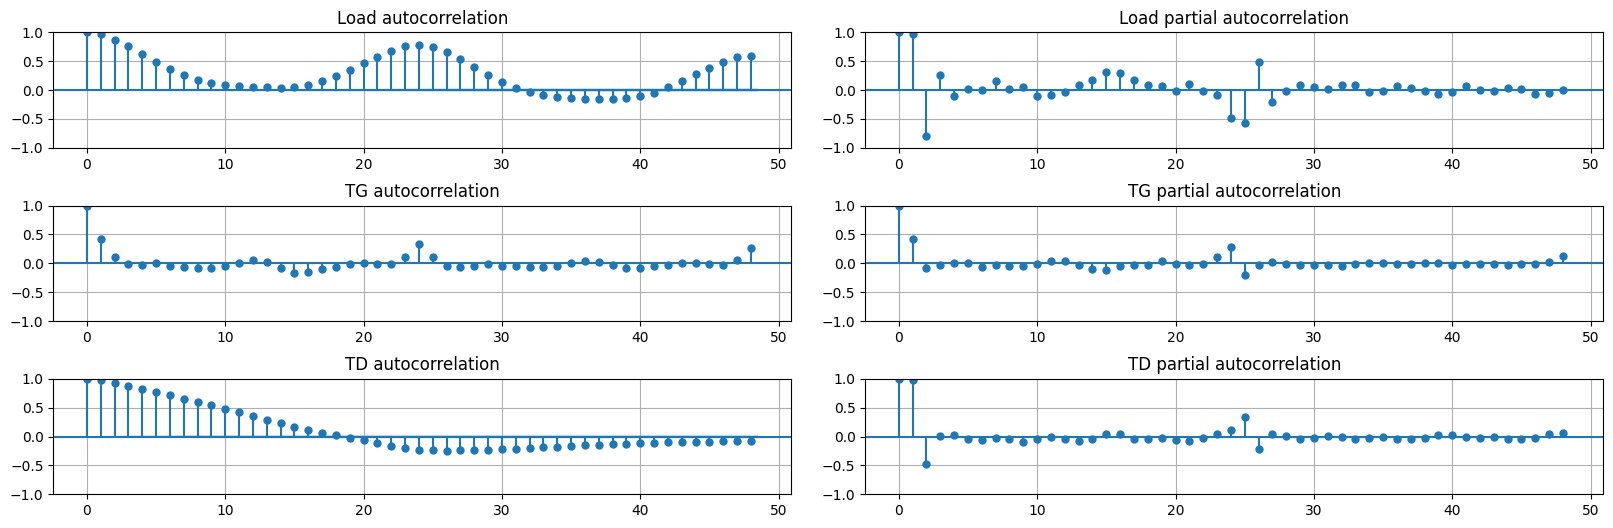

In [13]:
fig,ax=plt.subplots(3,2,figsize=(20,6))
plt.subplots_adjust(wspace=0.1,hspace=0.5)

labels=['Load','TG','TD']
for index,label in enumerate (labels):
    plot_acf(trainData[label],ax=ax[index,0])
    plot_pacf(trainData[label],ax=ax[index,1])
    ax[index,0].grid()
    ax[index,1].grid()
    ax[index,0].set_title(label+' autocorrelation')
    ax[index,1].set_title(label +' partial autocorrelation')
    #ax[0,1].legend[label]





In [14]:
from statsmodels.tsa.stattools import kpss

adfTest=pm.arima.ADFTest(alpha=0.05)
for label in labels:
    p_val,diff=adfTest.should_diff(trainData[label])
    print(label,':',p_val,kpss(trainData[label])[1])




/tmp/ipykernel_33099/348091029.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(label,':',p_val,kpss(trainData[label])[1])


Load : 0.01 0.01


/tmp/ipykernel_33099/348091029.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(label,':',p_val,kpss(trainData[label])[1])


TG : 0.01 0.1
TD : 0.01 0.1


/tmp/ipykernel_33099/348091029.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(label,':',p_val,kpss(trainData[label])[1])


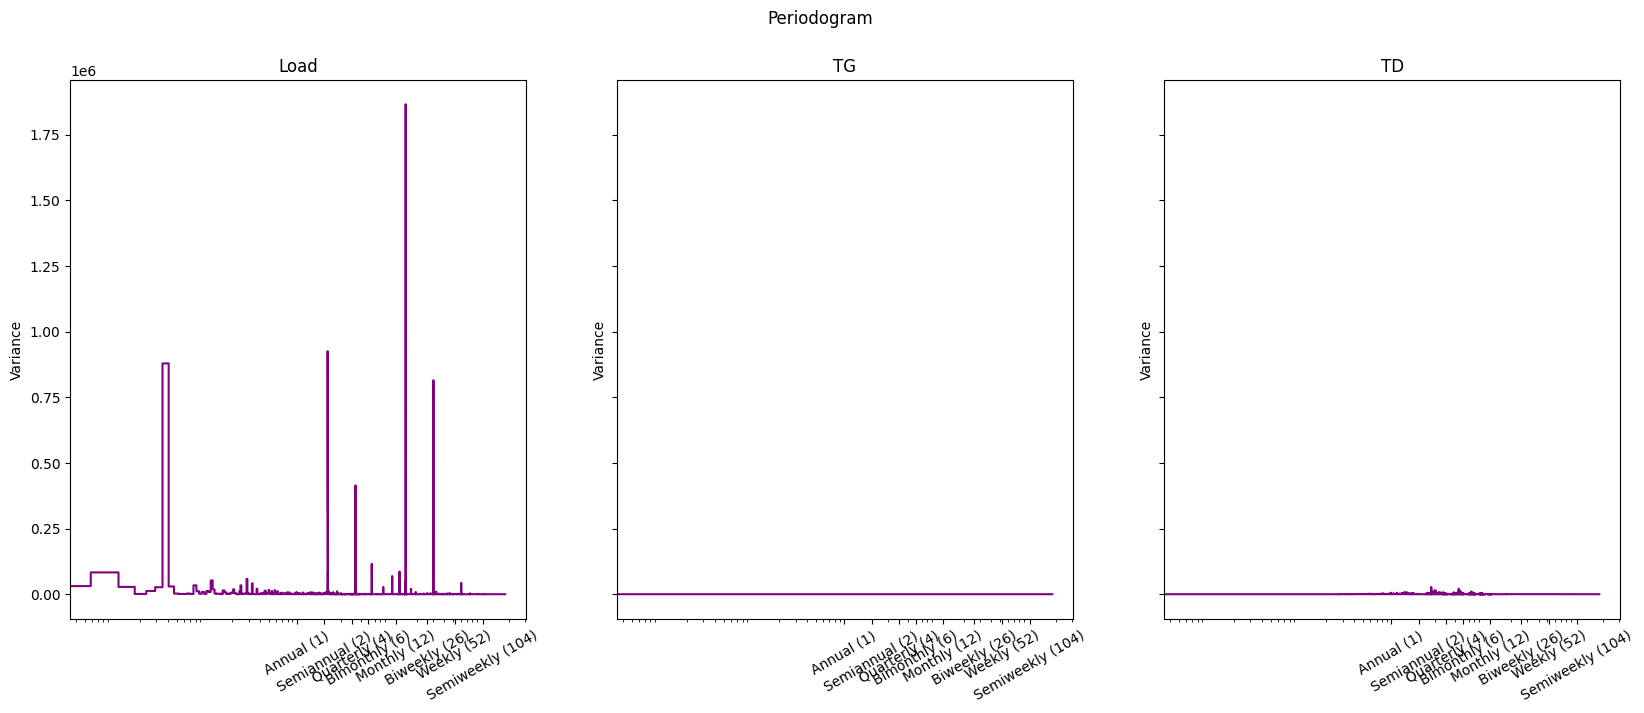

In [15]:
from learntools.time_series.utils import plot_periodogram, seasonal_plot
fig,ax=plt.subplots(1,3,figsize=(20,7),sharey=True)
fig.suptitle('Periodogram')
for index,label in enumerate (labels):
    plot_periodogram(trainData[label],ax=ax[index])
    ax[index].set_title(label)


In [9]:
#plt.figure(figsize=(24,10))
#df['TimeWithout'] = df['Time'].dt.strftime('%m/%d:%H')
#
#for yearr in [2021,2022,2023,2024]:#df.year.unique():
#    frame=df.loc[(df.Time.dt.year==yearr)&(df.Time.dt.month==7)] 
#    plt.plot(frame.TimeWithout,frame.Load)
#
#    frame
#plt.xticks(rotation=45)
#plt.xticks(plt.xticks()[0][::168])
#plt.tight_layout()
#plt.grid()
#
#plt.legend(df.Time.dt.year.unique())
#plt.savefig('yearscompairosn')

In [16]:
end_train=pd.to_datetime('2022-02-28 10:00',utc=True)
trainData,testData=dataSplit(df,end_train)





In [17]:
AARIMALoad=auto_arima(trainData.Load,trace=True,max_p=8, max_d=1, max_q=8)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=81.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1021288.187, Time=1.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=967320.401, Time=4.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=974814.123, Time=16.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1021286.188, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=958820.446, Time=5.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=958793.609, Time=7.65 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=958233.218, Time=9.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=957853.970, Time=10.80 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=955102.438, Time=15.07 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=954789.094, Time=16.71 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=954192.809, Time=20.12 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=954067.825, Time=58.51 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=951425.518, Time=140.72 sec
 

In [18]:
AARIMATG=auto_arima(trainData.TG,trace=True,max_p=8, max_d=1, max_q=8)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=851408.814, Time=39.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=863932.936, Time=1.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=851978.934, Time=1.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=852469.499, Time=4.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=863930.938, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=851457.278, Time=11.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=851437.810, Time=14.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=850027.043, Time=110.63 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=851427.034, Time=33.71 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=849924.810, Time=113.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=851430.591, Time=12.33 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=851266.349, Time=66.09 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=134.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=101.61 sec
 ARIM

In [19]:
AARIMATD=auto_arima(trainData.TD,trace=True,max_p=8, max_d=1, max_q=8)
#Performing stepwise search to minimize aic
# ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=906181.796, Time=26.94 sec
# ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1124435.169, Time=1.44 sec
# ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=923042.848, Time=1.82 sec
# ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.76 sec
# ARIMA(0,0,0)(0,0,0)[0]             : AIC=1124433.207, Time=0.59 sec
# ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=906601.802, Time=14.88 sec
# ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=906214.983, Time=5.15 sec
# ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=906174.855, Time=81.12 sec
# ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=906208.262, Time=11.44 sec
# ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=904830.825, Time=121.96 sec
# ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=906183.714, Time=36.06 sec
# ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=904932.363, Time=131.26 sec
# ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=118.07 sec
# ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=95.41 sec
# ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=905042.188, Time=110.88 sec
# ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=131.85 sec
# ARIMA(4,0,2)(0,0,0)[0]             : AIC=904772.592, Time=28.14 sec
# ARIMA(3,0,2)(0,0,0)[0]             : AIC=906172.856, Time=15.79 sec
# ARIMA(4,0,1)(0,0,0)[0]             : AIC=906181.715, Time=7.77 sec
# ARIMA(5,0,2)(0,0,0)[0]             : AIC=904933.335, Time=32.29 sec
# ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=44.83 sec
# ARIMA(3,0,1)(0,0,0)[0]             : AIC=906206.263, Time=2.72 sec
# ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=47.84 sec
# ARIMA(5,0,1)(0,0,0)[0]             : AIC=905030.751, Time=26.71 sec
# ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=34.96 sec
#
#Best model:  ARIMA(4,0,2)(0,0,0)[0]          
#Total fit time: 1144.703 seconds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=863859.573, Time=23.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1074155.542, Time=1.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=880607.368, Time=1.73 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=18.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1074153.582, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=864242.034, Time=13.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=863901.416, Time=4.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=863850.790, Time=74.59 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=863900.622, Time=11.24 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=862852.565, Time=114.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=863863.274, Time=37.03 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=862828.390, Time=136.02 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=862697.751, Time=105.51 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=863749.857, Time=7.02 se

In [20]:
import pickle
with open('Load.pkl', 'wb') as pkl:
    pickle.dump(AARIMALoad, pkl)
with open('TG.pkl', 'wb') as pkl:
    pickle.dump(AARIMATG, pkl)
with open('TD.pkl', 'wb') as pkl:
    pickle.dump(AARIMATD, pkl)



NameError: name 'AARIMA' is not defined

In [ ]:
AARIMA=auto_arima(trainData.TD,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=906181.796, Time=26.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1124435.169, Time=1.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=923042.848, Time=1.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1124433.207, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=906601.802, Time=14.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=906214.983, Time=4.95 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=906174.855, Time=79.57 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=906208.262, Time=11.27 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=904830.825, Time=122.87 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=906183.714, Time=36.03 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=904932.363, Time=128.99 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=119.29 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=96.72 sec
 ARIMA(5,0,

2022-02-28 11:00:00+01:00   -367.669673
2022-02-28 12:00:00+01:00   -294.576033
2022-02-28 13:00:00+01:00   -264.553102
2022-02-28 14:00:00+01:00   -257.222806
2022-02-28 15:00:00+01:00   -253.221050
2022-02-28 16:00:00+01:00   -244.101951
2022-02-28 17:00:00+01:00   -228.912394
2022-02-28 18:00:00+01:00   -210.034881
2022-02-28 19:00:00+01:00   -189.879939
2022-02-28 20:00:00+01:00   -169.776017
2022-02-28 21:00:00+01:00   -150.122673
2022-02-28 22:00:00+01:00   -130.894414
2022-02-28 23:00:00+01:00   -112.018030
2022-03-01 00:00:00+01:00    -93.516890
2022-03-01 01:00:00+01:00    -75.504214
2022-03-01 02:00:00+01:00    -58.128070
2022-03-01 03:00:00+01:00    -41.527296
2022-03-01 04:00:00+01:00    -25.813224
2022-03-01 05:00:00+01:00    -11.069474
2022-03-01 06:00:00+01:00      2.641729
2022-03-01 07:00:00+01:00     15.273880
2022-03-01 08:00:00+01:00     26.793211
2022-03-01 09:00:00+01:00     37.177752
2022-03-01 10:00:00+01:00     46.417144
Freq: H, dtype: float64

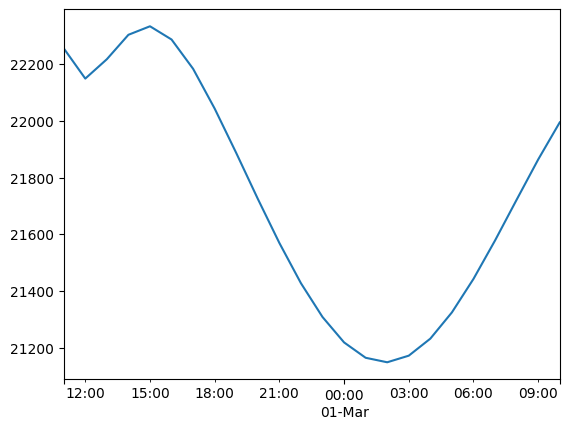

In [26]:
AARIMALoad.predict(24).plot()
#testData.set_index('Time',inplace=True) ARIMA(4,0,2)(0,0,0)[0] Best model:  ARIMA(2,0,2)(0,0,0)[0]  
AARIMATD.predict(24)

In [35]:
AARIMATD.update(trainData[['TG']].tail(11))
AARIMATD.predict(n_periods=3)


array([-429.40742551, -380.68389754, -371.74897174])

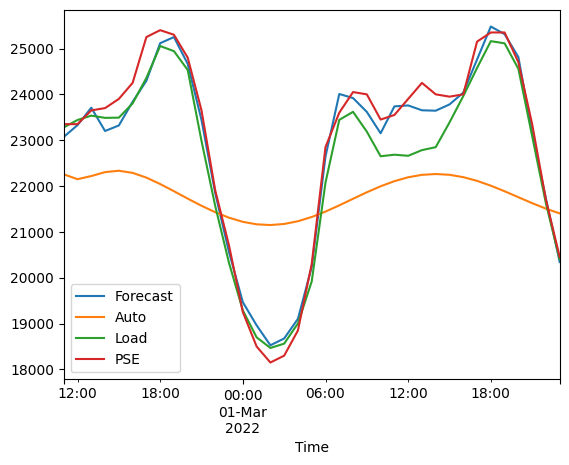

In [41]:
(AARIMATD.predict(37)+testData.TDdet).plot()
(AARIMALoad.predict(37)).plot()
testData.Load.plot()
testData.PSEforecast.plot()
plt.legend(['Forecast','Auto','Load','PSE'])